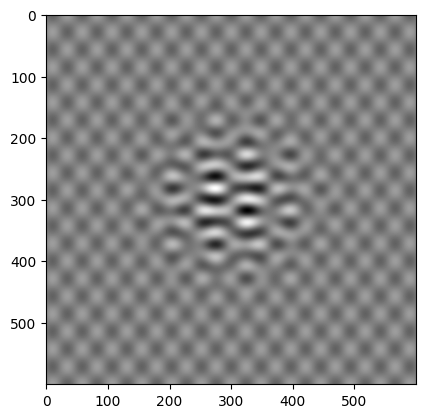

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Generate low-rank data
t = np.arange(-3, 3, 0.01)

Utrue = np.array([np.cos(17*t) * np.exp(-t**2), np.sin(11*t)]).T
Strue = np.array([[2, 0], [0, 0.5]])
Vtrue = np.array([np.sin(5*t) * np.exp(-t**2), np.cos(13*t)]).T

X = Utrue @ Strue @ Vtrue.T
plt.imshow(X, cmap = 'gray')

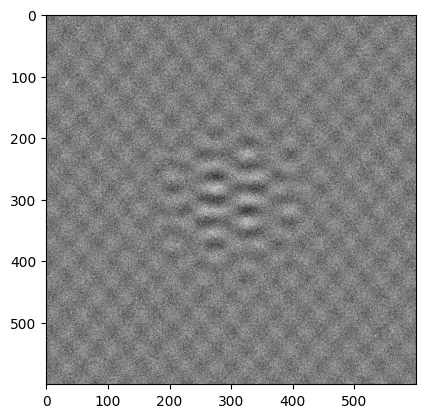

In [22]:
#Contaminate signal with noise
sigma = 1
Xnoisy = X + sigma*np.random.randn(*X.shape)
plt.imshow(Xnoisy, cmap = 'gray')

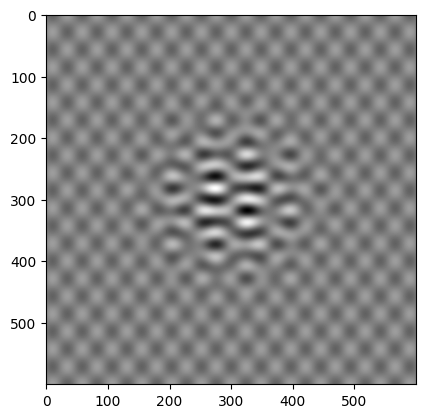

In [23]:
# Truncate using optimal hard threshhold
U ,S, VT = np.linalg.svd(X, full_matrices = 0)

N = Xnoisy.shape[0]
cutoff = (4/np.sqrt(3)) * np.sqrt(N) * sigma #Hard threshold
r = np.max(np.where (S > cutoff)) # Keep modes w/ S > cutoff
Xclean = U[:,:(r+1)] @ np.diag(S[: (r+1)]) @ VT[: (r+1),:]
plt.imshow(Xclean, cmap='gray')

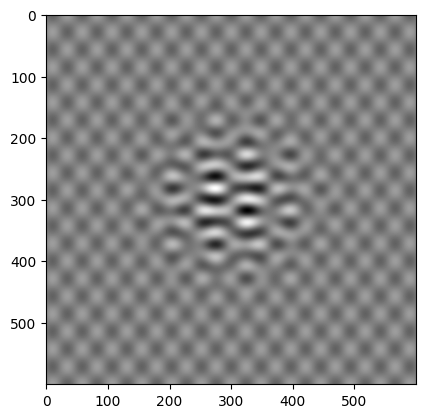

In [24]:
#Truncate to keep 90% of cumulative sum
cdS = np.cumsum(S) / np.sum(S)
r90 = np.min(np.where(cdS > 0.90))

X90 = U[:, :(r90+1)] @ np.diag(S[:(r90+1)]) @ VT[:(r90+1),:]
plt.imshow(X90, cmap='gray')